# Modello bifattoriale {#sec-cfa-bifactor}

::: {.chapterintro data-latex=""}
L'obiettivo di questo capitolo è di presentare un'introduzione al modello bifattoriale.
:::

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [ ]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(lavaan, psych, BifactorIndicesCalculator, semPlot)

## Introduzione

Numerose misure psicologiche sono progettate per valutare individui su un singolo costrutto. Tuttavia, caratteristiche psicologiche complesse come depressione e ansia spesso si manifestano in modi vari. Di conseguenza, è consigliabile includere item che coprono diverse aree tematiche per assicurare una validità di contenuto adeguata. Pertanto, molte scale di valutazione comunemente usate producono dati che si prestano a interpretazioni valide sia attraverso un modello unidimensionale, con un forte fattore generale, sia tramite un modello multidimensionale, che comprende due o più fattori correlati.

## Struttura Fattoriale

Recenti studi hanno evidenziato che, di fronte a misure che generano dati multidimensionali a causa di una diversificata struttura di contenuto, l'adozione di un modello di misurazione bifattoriale può essere particolarmente efficace per rappresentare la struttura sottostante. Questo modello suggerisce che le correlazioni tra gli item di un test possono essere spiegate attraverso due tipi di fattori: (a) un fattore generale che riflette la varianza condivisa tra tutti gli item, e (b) una serie di fattori di gruppo che catturano la varianza specifica non spiegata dal fattore generale e che è comune tra item simili in termini di contenuto. Generalmente, si ritiene che il fattore generale e i fattori di gruppo siano indipendenti.

Il fattore generale rappresenta il costrutto principale che lo strumento si propone di misurare, mentre i fattori di gruppo individuano costrutti più specifici legati a sottodomini. I modelli bifattoriali sono utilizzati per diverse finalità importanti:

- Analizzare la distribuzione della varianza quando si presume che uno strumento misuri sia varianza generale sia specifica di gruppo.
- Gestire la multidimensionalità in modo che la misura risulti "essenzialmente unidimensionale", pur presentando dimensioni secondarie.
- Verificare la presenza di un fattore generale sufficientemente robusto da giustificare l'uso di un modello di misurazione unidimensionale.
- Determinare l'adeguatezza di un punteggio complessivo e valutare l'utilità di analizzare le sottoscale specifiche.

Questi approcci permettono una comprensione più profonda e una valutazione più accurata della struttura sottostante dei dati psicologici, offrendo agli specialisti gli strumenti per interpretare con maggiore precisione i risultati dei test psicologici.


## Un esempio pratico

Consideriamo i dati `SRS_data` forniti dal pacchetto `BifactorIndicesCalculator`. Il dataset contiene 500 risposte al test SRS-22r sulla qualità della vita legata alla scoliosi, composta da 20 item. La sottoscala "Function" è composta dagli item 5, 9, 12, 15 e 18. La sottoscala "Pain" è composta dagli item 1, 2, 8, 11 e 17. La sottoscala "SelfImage" è composta dagli item 4, 6, 10, 14 e 19. La sottoscala "MentalHealth" è composta dagli item 3, 7, 13, 16 e 20.

Iniziamo esaminando le statistiche descrittive a livello di item e le correlazioni tra gli item.

In [3]:
describe(SRS_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRS_1,1,500,3.694,1.0651917,4,3.7775,1.4826,1,5,4,-0.55091527,-0.44128777,0.04763682
SRS_2,2,500,3.810,1.0295727,4,3.9200,1.4826,1,5,4,-0.71482596,-0.06788341,0.04604389
SRS_3,3,500,3.896,1.0897519,4,4.0375,1.4826,1,5,4,-0.83228535,-0.03970322,0.04873518
SRS_4,4,500,3.232,1.2796292,3,3.2900,1.4826,1,5,4,-0.10588960,-1.02358475,0.05722676
SRS_5,5,500,4.196,0.8939700,4,4.2975,1.4826,2,5,3,-0.74534622,-0.53845331,0.03997955
SRS_6,6,500,3.914,0.8718510,4,3.9525,1.4826,1,5,4,-0.37669898,-0.38588958,0.03899036
SRS_7,7,500,4.236,1.0111126,5,4.4025,0.0000,1,5,4,-1.28422859,1.08068127,0.04521833
SRS_8,8,500,3.796,1.1317888,4,3.9075,1.4826,1,5,4,-0.51397419,-0.69930792,0.05061513
SRS_9,9,500,4.408,1.0037685,5,4.6275,0.0000,1,5,4,-1.77060059,2.45174385,0.04488989


In [4]:
round(cor(SRS_data, use = "pairwise.complete.obs"), 2)

,SRS_1,SRS_2,SRS_3,SRS_4,SRS_5,SRS_6,SRS_7,SRS_8,SRS_9,SRS_10,SRS_11,SRS_12,SRS_13,SRS_14,SRS_15,SRS_16,SRS_17,SRS_18,SRS_19,SRS_20
SRS_1,1.00,0.88,0.43,0.36,0.36,0.39,0.34,0.70,0.31,0.37,0.46,0.59,0.37,0.36,0.19,0.40,0.38,0.30,0.27,0.33
SRS_2,0.88,1.00,0.40,0.38,0.35,0.42,0.35,0.70,0.34,0.40,0.49,0.58,0.35,0.38,0.20,0.37,0.39,0.29,0.31,0.32
SRS_3,0.43,0.40,1.00,0.32,0.33,0.39,0.50,0.46,0.30,0.32,0.24,0.46,0.55,0.34,0.19,0.55,0.25,0.25,0.28,0.41
SRS_4,0.36,0.38,0.32,1.00,0.23,0.43,0.32,0.33,0.19,0.43,0.20,0.30,0.30,0.20,0.23,0.32,0.10,0.21,0.54,0.32
SRS_5,0.36,0.35,0.33,0.23,1.00,0.33,0.39,0.33,0.47,0.34,0.23,0.52,0.31,0.29,0.20,0.42,0.28,0.31,0.25,0.40
SRS_6,0.39,0.42,0.39,0.43,0.33,1.00,0.48,0.37,0.25,0.64,0.28,0.37,0.41,0.38,0.22,0.47,0.22,0.31,0.62,0.41
SRS_7,0.34,0.35,0.50,0.32,0.39,0.48,1.00,0.40,0.24,0.37,0.22,0.42,0.53,0.44,0.23,0.78,0.19,0.39,0.39,0.56
SRS_8,0.70,0.70,0.46,0.33,0.33,0.37,0.40,1.00,0.30,0.37,0.36,0.52,0.40,0.28,0.14,0.42,0.31,0.32,0.28,0.34
SRS_9,0.31,0.34,0.30,0.19,0.47,0.25,0.24,0.30,1.00,0.36,0.26,0.49,0.32,0.29,0.22,0.32,0.35,0.27,0.20,0.31
SRS_10,0.37,0.40,0.32,0.43,0.34,0.64,0.37,0.37,0.36,1.00,0.26,0.37,0.30,0.34,0.22,0.39,0.19,0.28,0.54,0.35


In [5]:
SRS_UnidimensionalModel <-
"
    SRS =~ SRS_1 + SRS_2 + SRS_3 + SRS_4 + SRS_5 +
    SRS_6 + SRS_7 + SRS_8 + SRS_9 + SRS_10 +
    SRS_11 + SRS_12 + SRS_13 + SRS_14 + SRS_15 +
    SRS_16 + SRS_17 + SRS_18 + SRS_19 + SRS_20
"

SRS_Unidimensional <- lavaan::cfa(SRS_UnidimensionalModel,
    SRS_data,
    ordered = paste0("SRS_", 1:20),
    orthogonal = TRUE
)

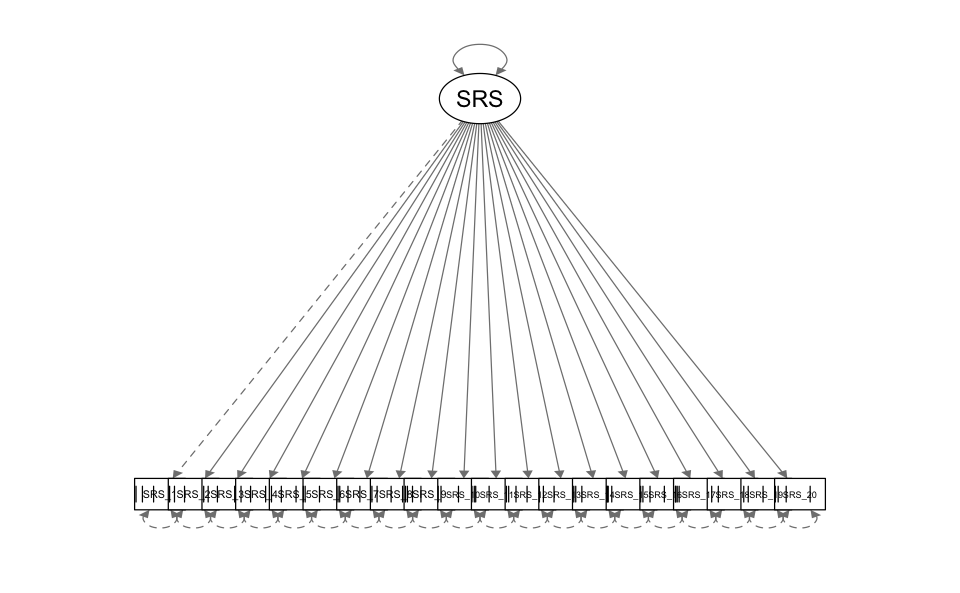

In [16]:
semPaths(
    SRS_Unidimensional, 
    intercepts = FALSE
)

Esaminiamo la bontà di adattamento.

In [10]:
fit.subset <- c(
    "chisq.scaled", "df", "pvalue.scaled",
    "rmsea.scaled", "rmsea.pvalue.scale",
    "rmsea.ci.lower.scaled", "rmsea.ci.upper.scaled",
    "cfi", "tli", "srmr"
)

In [11]:
fitmeasures(SRS_Unidimensional, fit.subset) |> print()

         chisq.scaled                    df         pvalue.scaled 
             2087.431               170.000                 0.000 
         rmsea.scaled rmsea.ci.lower.scaled rmsea.ci.upper.scaled 
                0.150                 0.145                 0.156 
                  cfi                   tli                  srmr 
                0.961                 0.956                 0.119 


In [12]:
SRS_BifactorModel <-
"
    SRS =~ SRS_1 + SRS_2 + SRS_3 + SRS_4 + SRS_5 + 
           SRS_6 + SRS_7 + SRS_8 + SRS_9 + SRS_10 +
           SRS_11 + SRS_12 + SRS_13 + SRS_14 + SRS_15 +
           SRS_16 + SRS_17 + SRS_18 + SRS_19 + SRS_20
    Function =~ SRS_5 + SRS_9 + SRS_12 + SRS_15 + SRS_18
    Pain =~ SRS_1 + SRS_2 + SRS_8 + SRS_11 + SRS_17
    SelfImage =~ SRS_4 + SRS_6 + SRS_10 + SRS_14 + SRS_19
    MentalHealth =~ SRS_3 + SRS_7 + SRS_13 + SRS_16 + SRS_20
"

SRS_bifactor <- lavaan::cfa(SRS_BifactorModel,
    SRS_data,
    ordered = paste0("SRS_", 1:20),
    orthogonal = TRUE
)

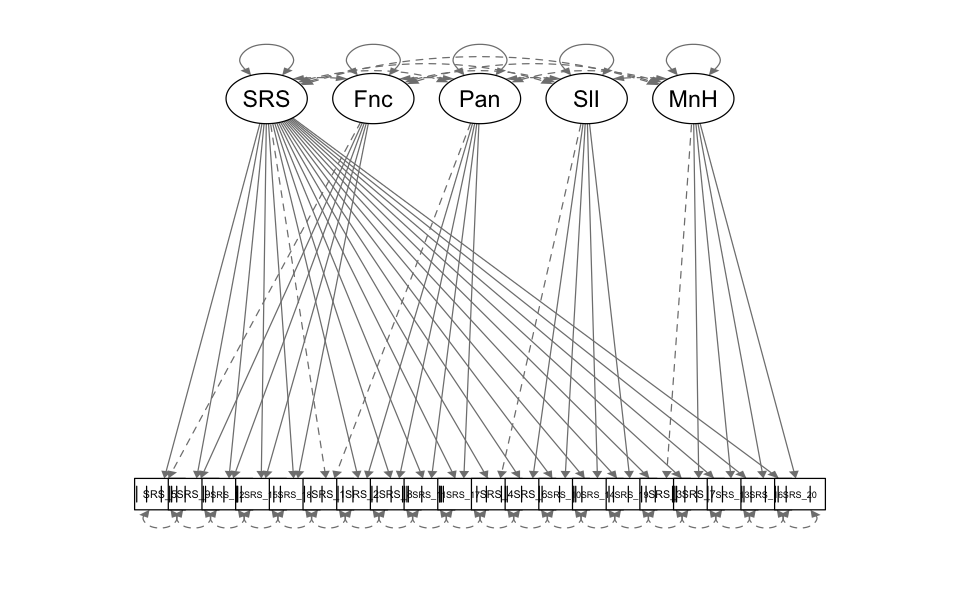

In [15]:
semPaths(
    SRS_bifactor,
    intercepts = FALSE
)

Esaminiamo la bontà di adattamento.

In [17]:
fitmeasures(SRS_bifactor, fit.subset) |> print()

         chisq.scaled                    df         pvalue.scaled 
              468.648               150.000                 0.000 
         rmsea.scaled rmsea.ci.lower.scaled rmsea.ci.upper.scaled 
                0.065                 0.059                 0.072 
                  cfi                   tli                  srmr 
                0.997                 0.996                 0.055 


Confrontiamo i due modelli.

In [18]:
lavTestLRT(SRS_Unidimensional, SRS_bifactor) |> print()


Scaled Chi-Squared Difference Test (method = "satorra.2000")

lavaan->lavTestLRT():  
   lavaan NOTE: The "Chisq" column contains standard test statistics, not the 
   robust test that should be reported per model. A robust difference test is 
   a function of two standard (not robust) statistics.
                    Df AIC BIC   Chisq Chisq diff Df diff Pr(>Chisq)    
SRS_bifactor       150          308.88                                  
SRS_Unidimensional 170         1965.48     1007.2      20  < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Consideriamo ora gli indici specifici per un modello bifattoriale.

In [19]:
bifactorIndices(SRS_bifactor, UniLambda = SRS_Unidimensional) |> print()

$ModelLevelIndices
   ECV.SRS        PUC  Omega.SRS OmegaH.SRS       ARPB 
 0.6728130  0.7894737  0.9423975  0.8338190  0.1209687 

$FactorLevelIndices
                ECV_SS     ECV_SG    ECV_GS     Omega     OmegaH         H
SRS          0.6728130 0.67281304 0.6728130 0.9423975 0.83381903 0.9431669
Function     0.1972990 0.04153902 0.8027010 0.7993085 0.09117569 0.4033325
Pain         0.4123779 0.11147096 0.5876221 0.8817340 0.34266587 0.6964443
SelfImage    0.3280132 0.08183383 0.6719868 0.8502075 0.20252347 0.5913544
MentalHealth 0.3424358 0.09234316 0.6575642 0.8917832 0.29303417 0.6148062
                    FD
SRS          0.9522166
Function     0.7096945
Pain         0.9209793
SelfImage    0.8297680
MentalHealth 0.8543576

$ItemLevelIndices
            IECV RelParBias
SRS_1  0.5104022 0.35337989
SRS_2  0.4976737 0.36753928
SRS_3  0.7980893 0.03658299
SRS_4  0.6115286 0.05215982
SRS_5  0.6353618 0.02256623
SRS_6  0.6366985 0.08805912
SRS_7  0.6318472 0.17893361
SRS_8  0.6819609 

I `ModelLevelIndices` possono essere spiegati nel modo seguente:

1. ECV.SRS: Questo indica la proporzione di varianza spiegata dal fattore generale nel modello bifattoriale. ECV sta per "Explained Common Variance" (Varianza Comune Spiegata). Un valore più alto indica che una maggiore parte della varianza totale nei dati è spiegata dal fattore generale.

2. PUC: Questo è l'acronimo di "Percentage of Uniqueness in Common" (Percentuale di Unicità nel Comune). Indica quanto della varianza unica (cioè quella non spiegata dal fattore generale) è presente nei fattori di gruppo. Un valore basso indica che i fattori di gruppo spiegano una maggiore parte della varianza unica nei dati.

3. Omega.SRS: Questo indice rappresenta il coefficiente di affidabilità del fattore generale del modello bifattoriale. Indica quanto sia affidabile il fattore generale nel catturare la varianza comune tra tutti gli item del test. Un valore più alto indica maggiore affidabilità.

4. OmegaH.SRS: Questo indice rappresenta il coefficiente di affidabilità dei fattori di gruppo nel modello bifattoriale. Indica quanto sia affidabile l'insieme dei fattori di gruppo nel catturare la varianza condivisa tra gli item del gruppo specifico. Anche qui, un valore più alto indica maggiore affidabilità.

5. ARPB: Questo sta per "Average Reproducibility of Parameter Estimates" (Riproducibilità Media delle Stime dei Parametri). Rappresenta la riproducibilità media delle stime dei parametri del modello bifattoriale. In sostanza, valuta quanto le stime dei parametri del modello sono affidabili e riproducibili.

La sezione dell'output `FactorLevelIndices` riguarda gli indici a livello di fattore del modello bifattoriale. 

1. ECV_SS, ECV_SG, ECV_GS: Questi rappresentano rispettivamente la proporzione di varianza spiegata dal Fattore Generale (GG), dal Fattore Specifico (SS) e dall'Interazione tra Fattore Generale e Fattore Specifico (GS) per ciascun fattore. Indicano quanto ciascun tipo di varianza contribuisce alla spiegazione della varianza totale nell'insieme dei dati del fattore.

2. Omega: Questo indice rappresenta il coefficiente di affidabilità dell'estratto del Fattore Generale per ciascun fattore. Indica quanto sia affidabile il Fattore Generale nel catturare la varianza comune tra gli item di quel particolare fattore. Un valore più alto indica maggiore affidabilità.

3. OmegaH: Questo indice rappresenta il coefficiente di affidabilità dell'estratto del Fattore Specifico per ciascun fattore. Indica quanto sia affidabile l'insieme dei Fattori Specifici nel catturare la varianza condivisa tra gli item del gruppo specifico. Anche qui, un valore più alto indica maggiore affidabilità.

4. H: Questo indice rappresenta la quota della varianza unica spiegata dal Fattore Generale per ciascun fattore. Indica quanto della varianza unica è spiegata dal Fattore Generale piuttosto che da fattori specifici.

5. FD: Questo indice rappresenta la distorsione fattoriale, che è una misura di quanto i dati si adattino bene al modello bifattoriale. Valori vicini a 1 indicano un buon adattamento.

Infine, l'output `ItemLevelIndices` riguarda gli indici a livello di item in un modello bifattoriale. 

1. IECV: Questo indica la proporzione di varianza spiegata dal Fattore Generale per ciascun item. IECV sta per "Item Explained Common Variance" (Varianza Comune Spiegata dell'Item). Indica quanto della varianza totale dell'item può essere spiegata dal Fattore Generale del modello bifattoriale. Valori più alti indicano che il Fattore Generale contribuisce maggiormente a spiegare le variazioni osservate nell'item.

2. RelParBias: Questo rappresenta il bias relativo dei parametri dell'item. Indica quanto i parametri dell'item sono influenzati dalla presenza del Fattore Generale e dai fattori specifici nel modello. Valori più alti indicano una maggiore influenza dei fattori specifici rispetto al Fattore Generale nell'item.

Per i dati dell'esempio considerato, di seguito è riportata un'interpretazione succinta dei risultati chiave per ciascun gruppo principale di risultati:

### Model-Level Indices
- **ECV.SRS (Explained Common Variance):** Il 67.28% della varianza osservata è spiegata dal modello.
- **PUC (Percentage of Uncontaminated Correlations):** Il 78.95% delle correlazioni tra gli item è "puro", cioè non contaminato da altri fattori oltre al fattore generale.
- **Omega.SRS:** La consistenza interna complessiva del test è molto alta (0.942), indicando una buona affidabilità.
- **OmegaH.SRS:** Il 83.38% della varianza totale standardizzata è attribuibile al fattore generale, confermando che è un fattore dominante nel modello.
- **ARPB (Average Relative Parameter Bias):** Un bias relativo medio basso (0.121) suggerisce che le stime dei parametri sono relativamente poco distorte.

### Factor-Level Indices
- **ECV (Explained Common Variance) per i fattori specifici:** 
  - Funzione: 19.73% della varianza è spiegata dal fattore specifico "Funzione", con l'80.27% attribuibile al fattore generale.
  - Dolore (Pain): 41.24% della varianza è spiegata dal fattore specifico "Dolore".
  - Autopercezione (SelfImage): 32.80% della varianza è spiegata dal fattore specifico "Autopercezione".
  - Salute Mentale (MentalHealth): 34.24% della varianza è spiegata dal fattore specifico "Salute Mentale".
- **Omega e OmegaH per ogni fattore specifico:** Le misure Omega indicano la consistenza interna per ciascun sottogruppo di item, mentre OmegaH indica la proporzione della varianza attribuibile ai fattori specifici rispetto al fattore generale.

### Item-Level Indices
- **IECV (Item Explained Common Variance):** Valori come 0.937 per SRS_12 e quasi 1 per SRS_14, SRS_15 e SRS_18 indicano che questi item sono molto influenzati dal fattore generale.
- **RelParBias (Relative Parameter Bias):** La maggior parte degli item mostra un bias relativo basso, suggerendo che gli effetti dei fattori specifici su questi item sono correttamente rappresentati senza grande distorsione.

In sintesi, il modello bifattoriale sembra adattarsi bene ai dati, con un forte fattore generale che domina la struttura del test, supportato da alcuni fattori specifici che spiegano porzioni significative della varianza in diverse aree tematiche. Gli item individuati con alti valori di IECV sono particolarmente rappresentativi del fattore generale.

## Commenti e considerazioni conclusive

In questo capitolo, abbiamo esplorato diversi indici derivati dall'analisi con un modello bifattoriale, ognuno dei quali rivela aspetti specifici delle proprietà psicometriche di uno strumento di misura. Questi indici sono di grande utilità per gli sviluppatori e i valutatori di scale, oltre a essere strumenti preziosi per i ricercatori e i professionisti che le impiegano nella pratica clinica e nella ricerca. Inoltre, contribuiscono allo sviluppo e alla comprensione dei costrutti psicologici che tali strumenti intendono misurare.

## Session Info

In [20]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] BifactorIndicesCalculator_0.2.2 ggokabeito_0.1.0               
 [3] viridis_0.6.5                   viridisLite_0.4.2              
 [5] ggpubr_0.6.0                    ggExtra_0.10.1                 
 [7] gridExtra_2.3                   patchwork_1.3.0                
 [9] bayesplot_1.11.1                semTools_0.5-6                 
[11] semPlot_1.1.6                   lavaan_0.6-18                  
[13] psych_2.4.6.26                  scales_1.3.0                   
[15] markd